# Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

In [2]:
import tensorflow as tf
#from tensorflow import keras
import keras
print(tf.__version__)
print(keras.__version__)

2024-04-17 10:31:40.837087: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 10:31:40.840591: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 10:31:40.986283: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 10:31:41.573042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 10:31:42.677112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

2.16.1
3.0.5


## Define global constants

In [3]:
MY_OPTIMIZER = "Adam"
MY_EPOCHS = 25
#MY_LEARNING_RATE = 0.1

# Get the Data

In [4]:
maneuvers = pd.read_csv("maneuvers.csv")
#maneuvers.head()
maneuvers.shape

(2344, 8)

In [5]:
maneuvers.describe()

,t,x,y,z,dx,dy,dz,dv_st
count,2344.000000,2344.000000,2.344000e+03,2344.000000,2.344000e+03,2344.000000,2.344000e+03,2.344000e+03
mean,7548.350621,-0.990424,-5.895742e-07,-0.000168,-4.952150e-07,-0.000011,2.453067e-07,1.729460e-08
std,4349.693426,0.001021,3.212275e-03,0.000715,2.139333e-03,0.006607,1.474166e-03,2.512213e-08
min,19.280590,-0.991668,-4.523862e-03,-0.001139,-3.247579e-03,-0.009040,-2.084719e-03,-2.785758e-08
25%,3783.815250,-0.991459,-3.224401e-03,-0.000878,-1.993437e-03,-0.006529,-1.487002e-03,-2.321468e-09
50%,7548.350500,-0.990587,-1.529082e-05,-0.000219,-5.756147e-06,-0.000394,6.194265e-06,1.033334e-08
75%,11312.887500,-0.989400,3.228971e-03,0.000540,1.972725e-03,0.006461,1.480479e-03,3.709943e-08
max,15077.420000,-0.988843,4.523994e-03,0.000913,3.247771e-03,0.009939,2.084456e-03,7.822104e-08


## Add/Drop Features

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [6]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
maneuvers = maneuvers.drop(["t"], axis=1)

# Prepare the Data for Machine Learning Algorithms

In [7]:
# Let's separate the predictors and the labels
maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.989189,0.002520,-0.000968,0.002222,-0.007492,-0.001014
1,-0.988843,-0.000112,-0.001121,-0.000103,-0.009031,0.000045
2,-0.989246,-0.002703,-0.000941,-0.002366,-0.007233,0.001091
3,-0.990157,-0.004300,-0.000479,-0.003245,-0.002797,0.001838
4,-0.991066,-0.004307,0.000136,-0.002407,0.002813,0.002033


## Create a Train/Test/Validation Set

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(1406, 6)
(469, 6)
(469, 6)


,x,y,z,dx,dy,dz
2059,-0.991667,-0.000101,0.000911,-0.000021,0.009937,0.000057
289,-0.988900,-0.001057,-0.001098,-0.000964,-0.008782,0.000420
1690,-0.990943,-0.004427,0.000035,-0.002634,0.001899,0.002075
709,-0.991485,-0.003187,0.000574,-0.001205,0.006784,0.001653
1822,-0.991546,0.002786,0.000666,0.000936,0.007604,-0.001486


In [9]:
# Scale all the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[7.08089927e-05, 4.88831512e-01, 9.99451942e-01, 4.96799392e-01,
        9.99920909e-01, 5.13763358e-01],
       [9.79713224e-01, 3.83209855e-01, 1.95195123e-02, 3.51512374e-01,
        1.35711198e-02, 6.00885211e-01],
       [2.56611790e-01, 1.07393859e-02, 5.72220425e-01, 9.44163132e-02,
        5.76373551e-01, 9.97672201e-01],
       [6.45778014e-02, 1.47751191e-01, 8.34907940e-01, 3.14450338e-01,
        8.33767667e-01, 8.96482637e-01],
       [4.29810586e-02, 8.07895444e-01, 8.80057047e-01, 6.44042523e-01,
        8.76982648e-01, 1.43709727e-01]])

In [10]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_valid_scaled = scaler.transform(y_valid)
y_test_scaled = scaler.transform(y_test)

# Building, Training, and Evaluating the Model

The output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the mean squared error. 

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [11]:
model = keras.models.Sequential([
keras.layers.Dense(300, activation="relu", input_shape=X_train_scaled.shape[1:]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])
model.summary()

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="mean_squared_error", optimizer=MY_OPTIMIZER)
history = model.fit(X_train_scaled, y_train_scaled, epochs=MY_EPOCHS, 
                    validation_data=(X_valid_scaled, y_valid_scaled))

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1300 - val_loss: 0.0148
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0069
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0044
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 9/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 10/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 11/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 12/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_lo

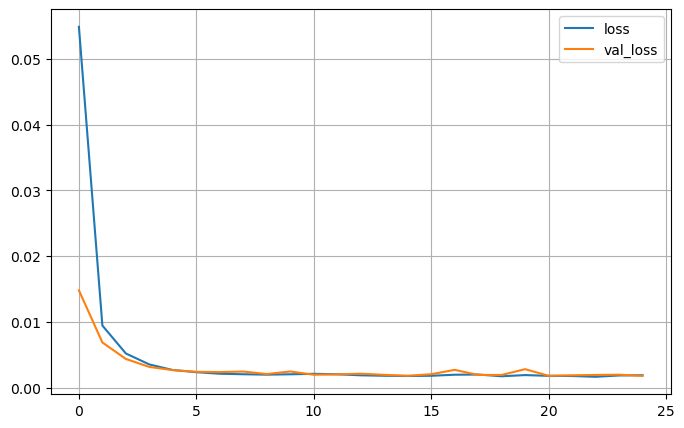

In [13]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 5e-4) # set the vertical range to [0-1]
plt.show()

In [14]:
mse_test = model.evaluate(X_test_scaled, y_test_scaled)
np.sqrt(mse_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0018


0.04237236320434643

In [15]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [16]:
y_test_scaled[:3]

array([[0.33155624],
       [0.86742974],
       [0.56989627]])

In [17]:
y_pred[:3]

array([[0.36428845],
       [0.7275409 ],
       [0.5155579 ]], dtype=float32)

# Fine-Tuning Neural Network Hyperparameters

Wrap our Keras models in objects that mimic regular Scikit-Learn regressors.

def build_model(n_hidden, n_neurons, learning_rate, 
                input_shape):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", 
                                     **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3, 
                input_shape=[8])

In [18]:
import keras
from keras import layers


def build_model(hp):
    model = keras.Sequential()
    #model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
               # Tune number of units separately for each layer.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1))
    #learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        #optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        optimizer=MY_OPTIMIZER,
        loss="mean_squared_error",
    )
    return model


In [19]:
# Quickly test if model builds successfuly
import keras_tuner

build_model(keras_tuner.HyperParameters())

<Sequential name=sequential_1, built=False>

Use a randomized search to train hundreds of hyperparameter combinations  and see which one performs best on the validation set.

Note that RandomizedSearchCV uses K-fold cross-validation, so it
does not use X_valid and y_valid_scaled . These are just used for early stopping.

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, 
                                   n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train_scaled, epochs=100,
                  validation_data=(X_valid, y_valid_scaled),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [20]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [21]:
# print a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 2
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


Then, start the search for the best hyperparameter configuration. All the arguments passed to search is passed to model.fit() in each execution. Remember to pass validation_data to evaluate the model.

In [22]:
tuner.search(X_train_scaled, y_train_scaled, epochs=MY_EPOCHS, validation_data=(X_valid_scaled, y_valid_scaled))

Trial 20 Complete [00h 00m 06s]
val_loss: 0.001996397157199681

Best val_loss So Far: 0.0016266502207145095
Total elapsed time: 00h 02m 54s


## Query the results
When search is over, you can retrieve the best model(s). The model is saved at its best performing epoch evaluated on the validation_data.

In [23]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 224)            │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 160)            │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 320)            │        51,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 480)            │       154,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        15,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,593 (1010.13 KB)

 Trainable params: 258,593 (1010.13 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 01 summary
Hyperparameters:
num_layers: 5
units_0: 224
units_1: 160
units_2: 320
units_3: 480
units_4: 32
Score: 0.0016266502207145095

Trial 15 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 224
units_2: 128
units_3: 192
units_4: 224
Score: 0.001630619226489216

Trial 08 summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 448
units_2: 448
units_3: 192
units_4: 96
Score: 0.0016366218333132565

Trial 17 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 192
units_2: 320
units_3: 64
units_4: 320
Score: 0.0016370322555303574

Trial 12 summary
Hyperparameters:
num_layers: 4
units_0: 416
units_1: 512
units_2: 320
units_3: 32
units_4: 320
Score: 0.0016372782411053777

Trial 09 summary
Hyperparameters:
num_layers: 4
units_0: 288
units_1: 352
units_2: 128
units_3: 448
units_4: 416
Score: 0.0016442880732938647

Trial 13 summary
Hyperparameters:
nu

In [25]:
mse_test = best_model.evaluate(X_test_scaled, y_test_scaled)
np.sqrt(mse_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 


0.03833639038252608

In [26]:
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = best_model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [27]:
y_test_scaled[:3]

array([[0.33155624],
       [0.86742974],
       [0.56989627]])

In [28]:
y_pred[:3]

array([[0.32725474],
       [0.7135252 ],
       [0.5014198 ]], dtype=float32)